## Check if the aircraft is over land or ocean

We can achieve this just using the function *is_land()*

In [1]:
import ac3airborne.tools.is_land as il
import ac3airborne
from simplification.cutil import simplify_coords_idx

For example check if Cologne, Germany is on land:

In [2]:
lat = 50.938056
lon = 6.956944

il.is_land(lon, lat)

True

Now plot the flight with different colors over land or over ocean:

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#import xarray as xr
import numpy as np

#campaign = 'ACLOUD'
#aircraft = 'P5'
#number   = 'RF14'
#date     = '20170608'
#flight   = campaign + '_' + aircraft + '_' + number

# read gps data
#file = '~/ac3airborne/campaigns/'+campaign.lower()+'/'+aircraft.lower()+'/gps_ins/'+campaign+'_polar'+aircraft[1]+'_'+date+'_'+number+'.nc'
#ds_gps = xr.open_dataset(file)

In [4]:
def simplify_dataset(ds, tolerance):
    indices_to_take = simplify_coords_idx(np.stack([ds.lat.values, ds.lon.values], axis=1), tolerance)
    return ds.isel(time=indices_to_take)

In [5]:
cat = ac3airborne.get_intake_catalog()

In [6]:
ds_gps = cat['Polar5']['GPS_INS']['ACLOUD_P5_RF14'].to_dask()

In [18]:
ds_gps = ds_gps.isel(time=slice(1,-1))

In [25]:
dsreduced = simplify_dataset(ds_gps, 1e-3)

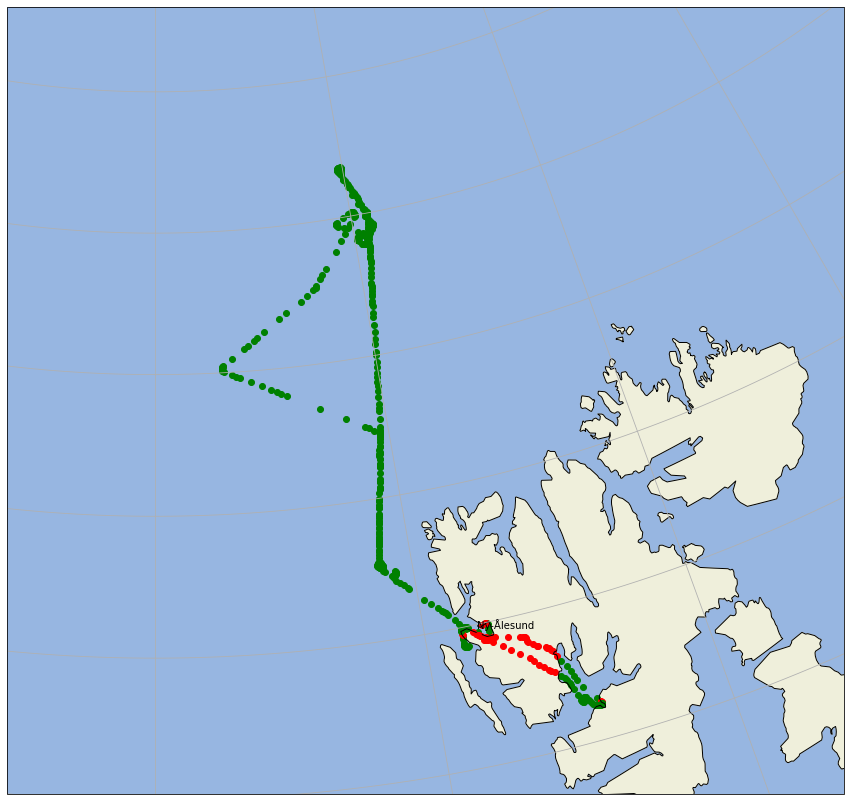

In [28]:
# prepare for plotting
proj   = ccrs.NorthPolarStereo()
extent = (-5.0, 24.0, 78.0, 83.0)

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=proj)
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.gridlines()
ax.coastlines()

nya_lat = 78.924444
nya_lon = 11.928611

ax.plot(nya_lon, nya_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(nya_lon, nya_lat+0.05, 'Ny-Ålesund', transform=ccrs.PlateCarree())

#for x, y in zip(ds_gps.lon, ds_gps.lat):
for x, y in zip(dsreduced.lon, dsreduced.lat):
    if il.is_land(x, y):
        ax.scatter(x, y, transform=ccrs.PlateCarree(), c='red')
    else:
        ax.scatter(x, y, transform=ccrs.PlateCarree(), c='green')